In [1]:
import tensorflow as tf
import logging
# disable tf warnings
tf.get_logger().setLevel(logging.ERROR)
from tensorflow.python.keras import Sequential
# For layers
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import InputLayer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class Phishing_Detection_Model:
    def __init__(self,num_features,load_weights=False,weights_path="phishing-detection-model.hf",train=True):
        self.load_weights = load_weights
        self.weights_path = weights_path
        self.learning_rate = 2e-4
        self.train_ = train
        self.num_features = num_features
        self.model = self.build_model()
    def build_model(self):
        model=Sequential(name="Phishing_Detection_Model")
        model.add(InputLayer(input_shape=(self.num_features), name='Input_Layer')) 
        model.add(Dense(100,activation='relu', name='Hidden_Layer1'))
        model.add(Dense(200,activation='relu', name='Hidden_Layer2'))
        model.add(Dense(100,activation='relu', name='Hidden_Layer3'))
        model.add(Dense(50, activation='relu', name='Hidden_Layer4')) 
        model.add(Dense(1, activation='sigmoid', name='Output_Layer')) 
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        if self.load_weights:
           model.load_weights(self.weights_path)
        return model

    def train(self, train_feature_vecs, train_answers_vec):
        if self.train_:
            history = self.model.fit(
                x=train_feature_vecs,
                y=train_answers_vec,
                validation_split=0.25,
                shuffle=True,
                epochs=50
            )
        self.model.save("phishing-detection-model")
        self.plot_stats(history)
    def predict(self, test_feature_vecs):
        return self.model.predict(test_feature_vecs)
    
    def plot_stats(self, history):
        accuracy = history.history["accuracy"]
        loss = history.history["loss"]
        epochs = range(1, len(accuracy) + 1)

        plt.title('Training accuracy and loss')
        plt.plot(epochs, accuracy, 'b*', label='Training accuracy')
        plt.plot(epochs, loss, 'b-', label='Training loss')
        plt.legend()
        plt.xlabel("Epochs")
        plt.savefig('Training accuracy and loss')

In [3]:
def calculate_accuracy(predictions, targets):
    correct = 0
    total = 0
    for i in range(len(predictions)):
        act_label = targets[i]
        pred_label = 0 if predictions[i] < 0.5 else 1
        if(act_label == pred_label):
            correct += 1
        total += 1
    accuracy = (correct/total)
    return accuracy

In [4]:
def get_features_targets(df, column):
    targets = df[column]
    targets = tf.convert_to_tensor(targets)
    features = df.drop(columns=column)
    features = tf.convert_to_tensor(features)
    return features, targets


In [5]:
def train_val_test_split(df, column):
    # train - 60%
    train = df.sample(frac = 0.8)
    # validation - 20% , test - 20%
    test = df.drop(train.index)
    train_features, train_targets = get_features_targets(train, column)
    test_features, test_targets = get_features_targets(test, column)
    return train_features, train_targets, test_features, test_targets 

In [7]:
data = pd.read_csv('cleaned_phishing_dataset.csv')
df = pd.DataFrame(data)
train_features, train_targets, test_features, test_targets = train_val_test_split(df, 'CLASS_LABEL')
assert train_features.shape[1] == test_features.shape[1] == len(df.columns) - 1

In [8]:
model = Phishing_Detection_Model(num_features=train_features.shape[1])

2023-02-26 20:12:29.580863: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50
188/188 [==============================] - 1s 2ms/step - loss: 0.4427 - accuracy: 0.7955 - val_loss: 0.2476 - val_accuracy: 0.9105
Epoch 2/50
188/188 [==============================] - 0s 1ms/step - loss: 0.2173 - accuracy: 0.9185 - val_loss: 0.1846 - val_accuracy: 0.9290
Epoch 3/50
188/188 [==============================] - 0s 1ms/step - loss: 0.1992 - accuracy: 0.9213 - val_loss: 0.1946 - val_accuracy: 0.9275
Epoch 4/50
188/188 [==============================] - 0s 1ms/step - loss: 0.1521 - accuracy: 0.9447 - val_loss: 0.2647 - val_accuracy: 0.9025
Epoch 5/50
188/188 [==============================] - 0s 1ms/step - loss: 0.1790 - accuracy: 0.9357 - val_loss: 0.1694 - val_accuracy: 0.9340
Epoch 6/50
188/188 [==============================] - 0s 1ms/step - loss: 0.1431 - accuracy: 0.9468 - val_loss: 0.1604 - val_accuracy: 0.9430
Epoch 7/50
188/188 [==============================] - 0s 1ms/step - loss: 0.1434 - accuracy: 0.9465 - val_loss: 0.1636 - val_accuracy: 0.9385
Epoch 

2023-02-26 20:12:40.786986: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


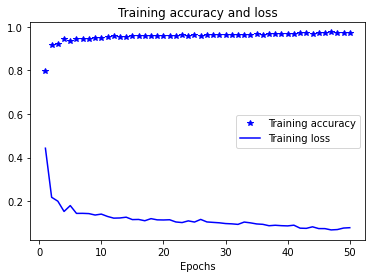

In [9]:
model.train(train_features,train_targets)

In [10]:
predicted_labels = model.predict(test_features)
calculate_accuracy(predictions=predicted_labels, targets=test_targets)

0.9635

In [11]:
data2 = pd.read_csv('phishing_dataset_full.csv')
df2 = pd.DataFrame(data2)
train_features2, train_targets2, test_features2, test_targets2 = train_val_test_split(df2,'phishing')

In [12]:
model2 = Phishing_Detection_Model(num_features=train_features2.shape[1])

Epoch 1/50
1663/1663 [==============================] - 2s 1ms/step - loss: 14.7804 - accuracy: 0.7075 - val_loss: 1.1521 - val_accuracy: 0.7918
Epoch 2/50
1663/1663 [==============================] - 2s 1ms/step - loss: 0.8514 - accuracy: 0.8018 - val_loss: 0.6051 - val_accuracy: 0.7767
Epoch 3/50
1663/1663 [==============================] - 2s 1ms/step - loss: 0.5035 - accuracy: 0.8281 - val_loss: 0.2910 - val_accuracy: 0.8898
Epoch 4/50
1663/1663 [==============================] - 2s 1ms/step - loss: 0.4273 - accuracy: 0.8505 - val_loss: 0.3230 - val_accuracy: 0.8790
Epoch 5/50
1663/1663 [==============================] - 2s 1ms/step - loss: 0.3448 - accuracy: 0.8708 - val_loss: 0.3066 - val_accuracy: 0.8781
Epoch 6/50
1663/1663 [==============================] - 2s 1ms/step - loss: 0.2843 - accuracy: 0.8827 - val_loss: 0.2670 - val_accuracy: 0.8788
Epoch 7/50
1663/1663 [==============================] - 2s 1ms/step - loss: 0.3643 - accuracy: 0.8444 - val_loss: 0.2654 - val_accuracy

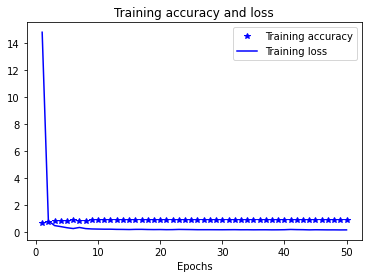

In [13]:
model2.train(train_features2,train_targets2)

In [14]:
predicted_labels2 = model2.predict(test_features2)
calculate_accuracy(predictions=predicted_labels2, targets=test_targets2)

0.925094477973941

In [25]:
data3 = pd.read_csv('phishing_dataset.csv')
df3 = pd.DataFrame(data3)
train_features3, train_targets3, test_features3, test_targets3 = train_val_test_split(df3,'ClassLabel')

In [26]:
model3 = Phishing_Detection_Model(num_features=train_features3.shape[1])

Epoch 1/50
188/188 [==============================] - 1s 2ms/step - loss: 9.2212 - accuracy: 0.8405 - val_loss: 2.0051 - val_accuracy: 0.8700
Epoch 2/50
188/188 [==============================] - 0s 2ms/step - loss: 2.8029 - accuracy: 0.8550 - val_loss: 4.1083 - val_accuracy: 0.8370
Epoch 3/50
188/188 [==============================] - 0s 2ms/step - loss: 0.8118 - accuracy: 0.8785 - val_loss: 0.5034 - val_accuracy: 0.8830
Epoch 4/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.8928 - val_loss: 0.8676 - val_accuracy: 0.8885
Epoch 5/50
188/188 [==============================] - 1s 3ms/step - loss: 0.3217 - accuracy: 0.8987 - val_loss: 0.4249 - val_accuracy: 0.8430
Epoch 6/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.9037 - val_loss: 0.2574 - val_accuracy: 0.9025
Epoch 7/50
188/188 [==============================] - 0s 1ms/step - loss: 0.3614 - accuracy: 0.9000 - val_loss: 0.3326 - val_accuracy: 0.8700
Epoch 

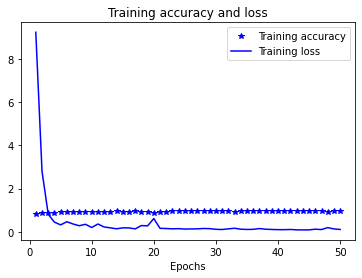

In [27]:
model3.train(train_features3,train_targets3)

In [28]:
predicted_labels3 = model3.predict(test_features3)
calculate_accuracy(predictions=predicted_labels3, targets=test_targets3)

0.9655

In [29]:
from LexicalUrlFeatures import LexicalURLFeatures
from ContentFeatures import ContentFeatures
from HostFeatures import HostFeatures

In [30]:
def feat_extraction(url):
    UrlFeats = LexicalURLFeatures(url)
    ContFeats = ContentFeatures(url)
    HostFeats = HostFeatures(url)

    feats = []
    ph_methods = ['url_length','url_path_length','url_host_length','url_host_is_ip','url_contains_port','num_of_digits',
                'num_of_parameters','num_of_fragments','is_encoded','num_encoded_chars','num_of_subdirectories',
                'num_of_periods','has_client_in_string','has_admin_in_string','has_server_in_string',
                'has_login_in_string','has_at_sign','redirection','tiny_url','uses_https','dash_in_domain']
    ph2_methods = ['number_of_html_tags','number_of_hidden_tags','number_of_script_tags','number_iframes',
                'number_embeds','number_of_hyperlinks','number_of_eval_functions','forwarding']
    ph3_methods = ['url_age','url_intended_life_span','url_life_remaining',
                'average_update_frequency','number_of_updates','ttl_from_registration']
    for method in ph_methods:
        feats.append(getattr(UrlFeats, method)())  # call
    for method in ph2_methods:
        feats.append(getattr(ContFeats, method)())  # call
    for method in ph3_methods:
        feats.append(getattr(HostFeats, method)())  # call
    return feats

In [48]:
feature = [feat_extraction("https://www.eventbrite.com/e/fridayz-afrobeats-amapiano-dancehall-soca-masada-tickets-478553154367?aff=ebdsoporgprofile")]
pred_label = model3.predict(feature)
pred_label = pred_label.flatten()
print(pred_label)
if pred_label > 0.5:
    print("phishing")
else:
    print("legitimate")

[0.04074994]
legitimate


In [22]:
from URLFeatureExtraction import featureExtraction

In [6]:
data4 = pd.read_csv('phishing_data2.csv')
df4 = pd.DataFrame(data4)
train_features4, train_targets4, test_features4, test_targets4 = train_val_test_split(df4,'Label')

2023-02-26 20:17:35.882685: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50
188/188 [==============================] - 1s 2ms/step - loss: 0.2552 - accuracy: 0.9138 - val_loss: 0.2368 - val_accuracy: 0.9265
Epoch 2/50
188/188 [==============================] - 0s 1ms/step - loss: 0.1925 - accuracy: 0.9388 - val_loss: 0.2141 - val_accuracy: 0.9335
Epoch 3/50
188/188 [==============================] - 0s 1ms/step - loss: 0.1869 - accuracy: 0.9412 - val_loss: 0.2084 - val_accuracy: 0.9305
Epoch 4/50
188/188 [==============================] - 0s 1ms/step - loss: 0.1865 - accuracy: 0.9420 - val_loss: 0.1985 - val_accuracy: 0.9350
Epoch 5/50
188/188 [==============================] - 0s 1ms/step - loss: 0.1846 - accuracy: 0.9423 - val_loss: 0.2046 - val_accuracy: 0.9350
Epoch 6/50
188/188 [==============================] - 0s 1ms/step - loss: 0.1811 - accuracy: 0.9422 - val_loss: 0.1947 - val_accuracy: 0.9360
Epoch 7/50
188/188 [==============================] - 0s 1ms/step - loss: 0.1823 - accuracy: 0.9425 - val_loss: 0.2031 - val_accuracy: 0.9355
Epoch 

2023-02-26 20:17:48.353177: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


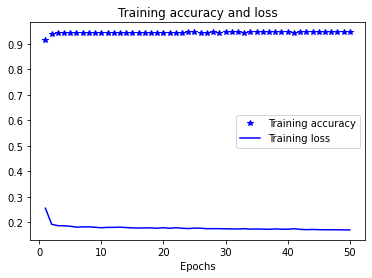

In [7]:
model4 = Phishing_Detection_Model(num_features=train_features4.shape[1])
model4.train(train_features4,train_targets4)

In [8]:
predicted_labels4 = model4.predict(test_features4)
calculate_accuracy(predictions=predicted_labels4, targets=test_targets4)

0.936

In [41]:
from URLFeatureExtraction import featureExtraction
feature = [featureExtraction("https://www.youtube.com/watch?v=pjewBSmWTlU")]
print(feature)
pred_label = model4.predict(feature)
pred_label = pred_label.flatten()
pred_label


hi1
hi1
hi2
hi
[[0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]]


array([1.], dtype=float32)

In [2]:
from tensorflow.python import keras
def load_phishing_detection_model():
    """
    load pretrained phishing detection model from disk
    """
    model = keras.models.load_model("phishing-detection-model2")
    model_inference = model.signatures["serving_default"]
    return model_inference

PhishingDetectionModel = load_phishing_detection_model()

In [28]:
from feature_extraction import feature_extraction
feature = [feature_extraction("https://www.hulu.com/watch/738f5e5f-fad3-402d-aa1f-2f72c44d8d01")]

https://www.hulu.com/watch/738f5e5f-fad3-402d-aa1f-2f72c44d8d01


In [29]:
import tensorflow as tf
import numpy as np
pred = PhishingDetectionModel(Input_Layer=tf.cast(tf.convert_to_tensor(feature), dtype="float"))
pred = np.array(pred["Output_Layer"]).flatten()
print(pred)
if pred > 0.5:
    print("phishing")
else:
    print("legitimate")


[0.]
legitimate
